In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [30]:
file = "Resources/netflix_country.csv"
happiness_file = "Resources/happiness_index_2021.csv"

In [31]:
Netflix_country = pd.read_csv(file, encoding="ISO-8859-1")
Happiness_index = pd.read_csv(happiness_file, encoding="ISO-8859-1")
Netflix_country

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/2008 0:00,3/4/2021 0:00,205926.0
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,70632.0,5/8/2020 0:00,3/4/2021 0:00,2838.0
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,12/3/2020 0:00,3/3/2021 0:00,131.0
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,6/14/2011 0:00,3/3/2021 0:00,47.0
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,Lithuania,1-2 hour,NaN,6.7,NaN,NaN,2.0,1.0,NaN,10/31/1949 0:00,3/3/2021 0:00,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122890,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Brazil,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/2015 0:00,71.0
122891,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Netherlands,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/2015 0:00,71.0
122892,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Italy,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/2015 0:00,71.0
122893,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Israel,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/2015 0:00,71.0


In [32]:
clean_netflix_country = Netflix_country.drop(["Hidden Gem Score", "IMDb Score", "Rotten Tomatoes Score", "Metacritic Score", "Awards Received","Awards Nominated For", "Boxoffice", "IMDb Votes","Tags"], axis=1)
clean_netflix_country = clean_netflix_country.rename(columns={'Country Availability': 'Country'})
Country = clean_netflix_country.groupby("Country")
Country = Country.nunique()["Title"]
Country_Avail = pd.DataFrame({"Total Count": Country})
Country_Avail

,Total Count
Country,
Argentina,3252
Australia,3582
Belgium,3462
Brazil,3158
Canada,3665
Colombia,3088
Czech Republic,3785
France,3271
Germany,3470


In [33]:
clean_happiness_index = Happiness_index.drop(["Ladder score", "Standard error of ladder score", "upperwhisker", "lowerwhisker"], axis=1)
clean_happiness_index = clean_happiness_index.rename(columns={'Country name': 'Country'})
Life_choices = clean_happiness_index[['Country', 'Freedom to make life choices', "Regional indicator"]]
Life_choices = Life_choices.sort_values(by="Freedom to make life choices", ascending=False) 
Life_choices

,Country,Freedom to make life choices,Regional indicator
41,Uzbekistan,0.970,Commonwealth of Independent States
5,Norway,0.960,Western Europe
113,Cambodia,0.959,Southeast Asia
3,Iceland,0.955,Western Europe
0,Finland,0.949,Western Europe
...,...,...,...
134,Madagascar,0.552,Sub-Saharan Africa
130,Comoros,0.548,Sub-Saharan Africa
122,Lebanon,0.525,Middle East and North Africa
108,Algeria,0.480,Middle East and North Africa


In [37]:
Country_merge = pd.merge(Life_choices, Country_Avail, on=["Country"])
Country_merge = Country_merge.rename(columns={'Total Count': 'Netflix Offerings'})
Country_merge = Country_merge.sort_values(by="Netflix Offerings", ascending=False) 
Country_merge

,Country,Freedom to make life choices,Regional indicator,Netflix Offerings
13,United Kingdom,0.859,Western Europe,3861
14,Czech Republic,0.858,Central and Eastern Europe,3785
23,Japan,0.796,East Asia,3738
28,Hungary,0.755,Central and Eastern Europe,3690
4,Canada,0.915,North America and ANZ,3665
8,India,0.893,South Asia,3627
2,Singapore,0.927,Southeast Asia,3619
10,Thailand,0.884,Southeast Asia,3596
15,Romania,0.845,Central and Eastern Europe,3591
5,Australia,0.914,North America and ANZ,3582


The r-value is 0.22, showing a slight postive correlation between the Freedom to make life choices factor of the Happiness Index and Netflix Offerings


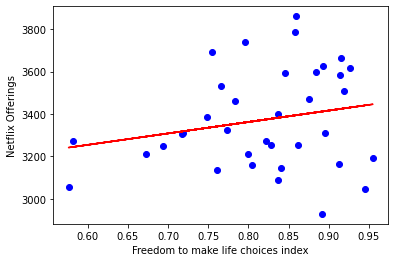

In [35]:
Correlation_model = st.pearsonr(Country_merge["Freedom to make life choices"],Country_merge["Netflix Offerings"])
Correlation_model = round(Correlation_model[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Country_merge['Freedom to make life choices'], Country_merge['Netflix Offerings'])
Regression_values=Country_merge['Freedom to make life choices']* slope + intercept
plt.scatter(Country_merge['Freedom to make life choices'],Country_merge['Netflix Offerings'], color="blue")
plt.plot(Country_merge['Freedom to make life choices'], Regression_values, color='red')
plt.xlabel("Freedom to make life choices index")
plt.ylabel("Netflix Offerings")
plt.title("")
plt.show
print(f"The r-value is {round(rvalue,2)}, showing a slight postive correlation between the Freedom to make life choices factor of the Happiness Index and Netflix Offerings")
